<a href="https://colab.research.google.com/github/Jack-Cruz/experiments/blob/main/class_01_basic_statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wquantiles

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
URL = "https://raw.githubusercontent.com/lmcanavals/experiments/main/data/state.csv"
state = pd.read_csv(URL)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [4]:
state['Population'].mean()

6162876.3

In [5]:
trim_mean(state['Population'], 0.1) #ignora los 5% más pequeño, y los 5% más grandes

4783697.125

In [6]:
state['Population'].median()

4436369.5

In [8]:
state['Murder.Rate'].mean()

4.066

In [10]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [12]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

In [13]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


# Estimaciones de variabilidad



In [15]:
state['Population'].std()

6848235.347401142

Rango intercuartil

In [18]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

Desviación absoluta media

In [19]:
robust.scale.mad(state['Population'])

3849876.1459979336

In [20]:
abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817

3849876.1459979336

#Percentiles y Boxplots

In [22]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [26]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.idex = [f"{p*100}%" for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


Text(0, 0.5, 'Población (millones)')

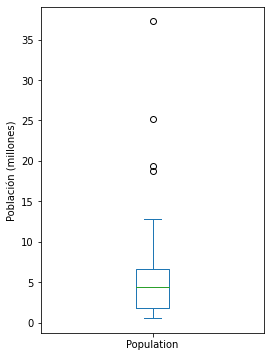

In [27]:
ax = (state['Population']/1_000_000).plot.box(figsize=(4, 6))
ax.set_ylabel('Población (millones)')

# Tablas de frecuencia, Histogramas

In [28]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [32]:
binnedPopulation.name = "binnedPopulation"
df = pd.concat([state, binnedPopulation], axis=1) #0: filas, 1:columna
df = df.sort_values(by="Population")

groups = []
for group, subset in df.groupby(by="binnedPopulation"):
  groups.append({
    "BinRange": group,
    "Count": len(subset),
    "States": ','.join(subset.Abbreviation)
  })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


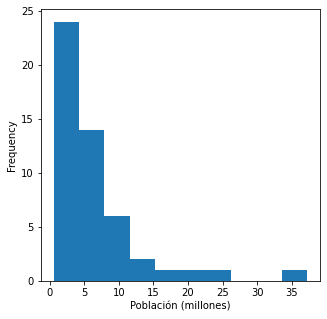

In [34]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(5, 5))
ax.set_xlabel('Población (millones)')

plt.show()

Estimación de densidad

Text(0.5, 0, 'Tasa de asesinatos (por 100_000)')

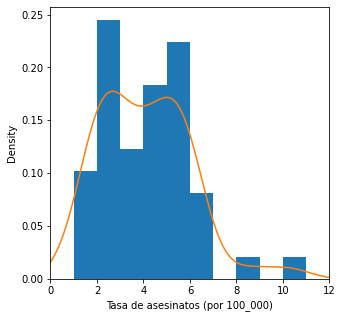

In [35]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], bins=range(1, 12), figsize=(5, 5))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel("Tasa de asesinatos (por 100_000)")


# Explorando data categórica o binaria

In [37]:
URL2 = "https://raw.githubusercontent.com/lmcanavals/experiments/main/data/dfw_airline.csv"
dfw = pd.read_csv(URL2)
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


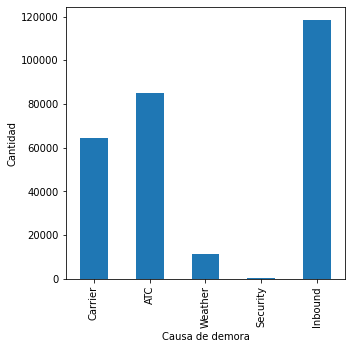

In [39]:
ax = dfw.transpose().plot.bar(figsize=(5, 5), legend=False)
ax.set_xlabel("Causa de demora")
ax.set_ylabel("Cantidad")
plt.show()

# Correlación

In [ ]:
URL3 = ""
URL4 = ""

In [ ]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == "telecommunications_services"]['symbol']
telecom = sp500_px.loc[sp500_px.index >= "2012_07_01", telecomSymbols]

In [ ]:
etfs = sp500_px.loc[sp500_px.index > "2012_07_01", sp500_sym[sp500_sym['sector'] == "etf"]["symbol"]]
etfs.head()

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmpa=True), )

In [ ]:
Luis Martin Canaval Sanchez
Luis Martin Canaval Sanchez
10:51 AM

from matplotlib.collections import EllipseCollection

from matplotlib.colors import Normalize



def plot_corr_ellipses(data, figsize=None, **kwargs):

    ''' stackoverflow.com/a/34558488 '''

    M = np.array(data)

    if not M.ndim == 2:

        raise ValueError('data must be a 2D array')

    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})

    ax.set_xlim(-0.5, M.shape[1] - 0.5)

    ax.set_ylim(-0.5, M.shape[0] - 0.5)

    ax.invert_yaxis()



    # xy locations of each ellipse center

    xy = np.indices(M.shape)[::-1].reshape(2, -1).T



    # set the relative sizes of the major/minor axes according to the strength of

    # the positive/negative correlation

    w = np.ones_like(M).ravel() + 0.01

    h = 1 - np.abs(M).ravel() - 0.01

    a = 45 * np.sign(M).ravel()



    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,

                           norm=Normalize(vmin=-1, vmax=1),

                           transOffset=ax.transData, array=M.ravel(), **kwargs)

    ax.add_collection(ec)



    # if data is a DataFrame, use the row/column names as tick labels

    if isinstance(data, pd.DataFrame):

        ax.set_xticks(np.arange(M.shape[1]))

        ax.set_xticklabels(data.columns, rotation=90)

        ax.set_yticks(np.arange(M.shape[0]))

        ax.set_yticklabels(data.index)



    return ec



m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')

cb = fig.colorbar(m)

cb.set_label('Correlation coefficient')



plt.tight_layout()

plt.show()

# Scatterplots

In [ ]:
ax = telecom.plot.scatter(x="T", y="VZ", figsize=(5, 5), marker="$\u25ef$")
ax.set_xlabel("ATT (T)")
ax.set_

In [ ]:
ax = telecom.plot.scatter(x="T", y="VZ", figsize=(5, 5), marker="$\u25ef$", alpha=0.5)
ax.set_xlabel("ATT (T)")
ax.set_

In [ ]:
# Análisis de varianza (Anoba)